# Import Necessary Libraries 

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
# import seaborn as sns
import statistics
import datetime
import calendar

In [2]:
#Load Data
uber_df = pd.read_csv('/Users/malgyblue/Desktop/Python Projects/Uber Project/My Uber Drives - 2016.csv')
uber_df= uber_df.dropna()
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [3]:
uber_df = uber_df.dropna()

# Date Analysis

In [4]:
#Convert string to datetime to identify components of Dates

In [5]:
uber_df['START_DATE*'] = pd.to_datetime(uber_df['START_DATE*'], format= '%m/%d/%Y %H:%M')
uber_df['END_DATE*'] = pd.to_datetime(uber_df['END_DATE*'], format= '%m/%d/%Y %H:%M')

uber_df['HOUR'] = [x.hour for x in uber_df['START_DATE*']]
uber_df['DAY'] = [x.day for x in uber_df['START_DATE*']]
uber_df['MONTH'] = [x.month for x in uber_df['START_DATE*']]
uber_df['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in uber_df['START_DATE*']]
uber_df['DAY_OF_WEEK'] = [x.dayofweek for x in uber_df['START_DATE*']]
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5


# DATA VISUALIZATION

In [6]:
#Showing the different purposes for an uber ride
purposes = list(uber_df['PURPOSE*'].unique())
purposes.remove(purposes[1])
purposes.sort()
purposes

['Airport/Travel',
 'Between Offices',
 'Charity ($)',
 'Commute',
 'Customer Visit',
 'Meal/Entertain',
 'Meeting',
 'Moving',
 'Temporary Site']

In [7]:
#Now we want to see for this specific user what purpose usually causes them to take an Uber
rides_per_purpose = {}
for i in purposes:
    rides_per_purpose[i] = sum(uber_df['PURPOSE*'] == i)
rides_per_purpose

{'Airport/Travel': 3,
 'Between Offices': 18,
 'Charity ($)': 1,
 'Commute': 1,
 'Customer Visit': 101,
 'Meal/Entertain': 160,
 'Meeting': 187,
 'Moving': 4,
 'Temporary Site': 50}

In [8]:
#If we break our rides up by category we can see that this individual calls a majority of rides for business reasons
uber_df.groupby(uber_df['CATEGORY*']).sum()

,MILES*,HOUR,DAY,MONTH,DAY_OF_WEEK
CATEGORY*,,,,,
Business,7097.7,9615,10159,4148,1965
Personal,213.5,65,106,42,12


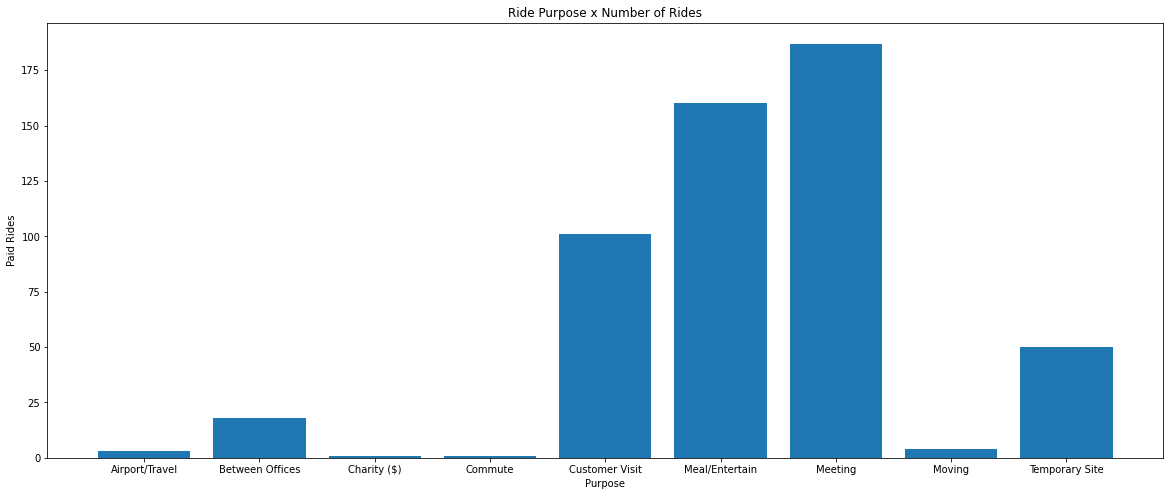

In [9]:
#Vizualization of amount of rides called by the purpose of the ride
purpose_index = [1,2,3,4,5,6,7,8,9]
LABELS = list(rides_per_purpose.keys())
plt.figure(figsize=(20, 8))
plt.bar(purpose_index, rides_per_purpose.values(), align='center')
plt.xticks(purpose_index, LABELS)
plt.title('Ride Purpose x Number of Rides')
plt.xlabel('Purpose')
plt.ylabel('Paid Rides')
plt.show()
#We can see that this individuals primarly using Uber for rides to meetings, Meals/Entertainment, and Errands
#Next we should analyze the distance of a ride per the purpose of it, we'll start simple with means and medians

In [10]:
np.std(list(rides_per_purpose.values()))

69.11825615084145

In [11]:
rides_per_purpose.values()

dict_values([3, 18, 1, 1, 101, 160, 187, 4, 50])

In [12]:
rides_per_purpose

{'Airport/Travel': 3,
 'Between Offices': 18,
 'Charity ($)': 1,
 'Commute': 1,
 'Customer Visit': 101,
 'Meal/Entertain': 160,
 'Meeting': 187,
 'Moving': 4,
 'Temporary Site': 50}

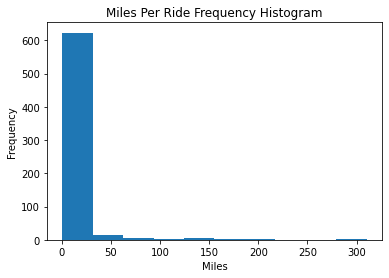

In [13]:
plt.hist(uber_df['MILES*'])
plt.title('Miles Per Ride Frequency Histogram')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()
#Here we can see most rides are on the shorter side from 0-25 miles in distance

Text(0.5, 1.0, 'Number of Trips vs Hours')

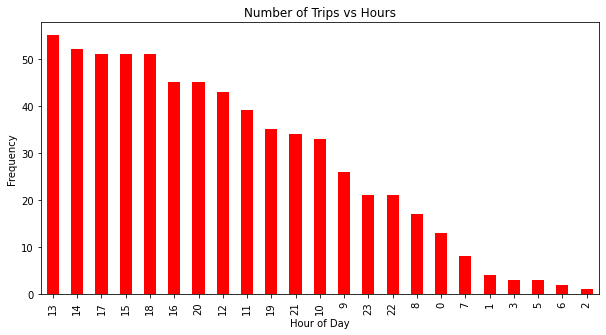

In [14]:
hour_slots = uber_df['HOUR'].value_counts()
hour_slots.plot(kind = 'bar', color ='red', figsize=(10,5))
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')
#We can see that the majority of rides are called beterrn 1 PM - 6 PM 

In [15]:
test = uber_df['HOUR'].value_counts().rename_axis('hour_of_day').reset_index(name='rides')
test['score'] = [x/max(test['rides']) for x in test['rides']]
test

,hour_of_day,rides,score
0,13,55,1.000000
1,14,52,0.945455
2,17,51,0.927273
3,15,51,0.927273
4,18,51,0.927273
5,16,45,0.818182
6,20,45,0.818182
7,12,43,0.781818
8,11,39,0.709091
9,19,35,0.636364


In [16]:
for i in hour_slots:
    print(i)

55
52
51
51
51
45
45
43
39
35
34
33
26
21
21
17
13
8
4
3
3
2
1


Text(0.5, 1.0, 'Number of Trips vs Day of the Week')

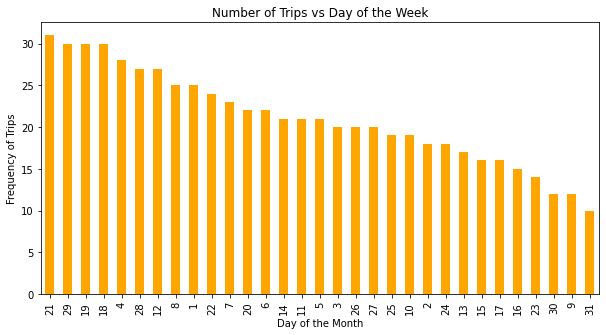

In [17]:
day_slots = uber_df['DAY'].value_counts()
day_slots.plot(kind = 'bar', color ='orange', figsize=(10,5))
plt.xlabel('Day of the Month')
plt.ylabel('Frequency of Trips')
plt.title('Number of Trips vs Day of the Week')
#We can see that the majority of rides are called during the 3rd week of the month

Text(0.5, 1.0, 'Number of Trips vs Day of the Week')

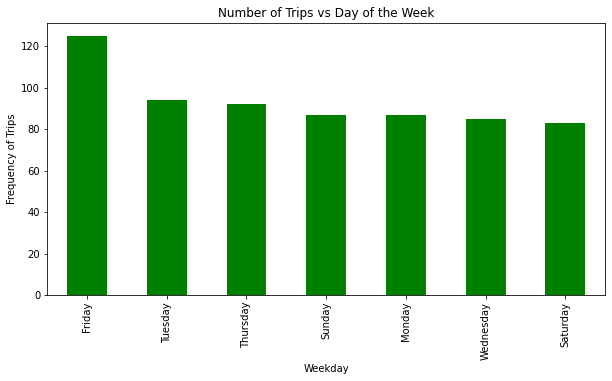

In [18]:
weekday_slots = uber_df['WEEKDAY'].value_counts()
weekday_slots.plot(kind = 'bar', color ='green', figsize=(10,5))
plt.xlabel('Weekday')
plt.ylabel('Frequency of Trips')
plt.title('Number of Trips vs Day of the Week')
#We can see that the majority of rides are called on Fridays with the rest of the weekdays falling in a similar frequency

Text(0.5, 1.0, 'Number of Trips vs Month')

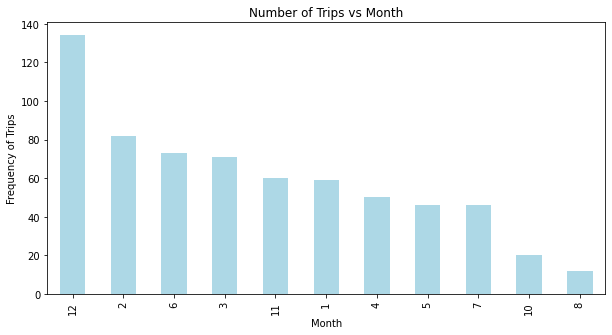

In [19]:
month_slots = uber_df['MONTH'].value_counts()
month_slots.plot(kind = 'bar', color ='lightblue', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Frequency of Trips')
plt.title('Number of Trips vs Month')
#We can see that the majority of rides are called in December, lets look at frequency of trips in within the days of december

Text(0.5, 1.0, 'Number of Trips vs Date in December')

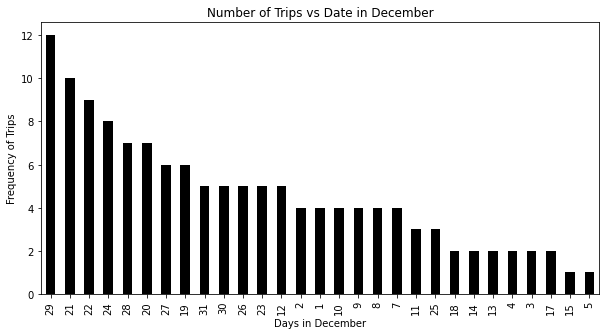

In [20]:
dec_slots = uber_df['DAY'][uber_df['MONTH']==12].value_counts()
dec_slots.plot(kind = 'bar', color ='black', figsize=(10,5))
plt.xlabel('Days in December')
plt.ylabel('Frequency of Trips')
plt.title('Number of Trips vs Date in December')
#We can see that the majority of rides are called on 29th near christmas/new years

Text(0.5, 1.0, 'Number of Trips vs Start Location')

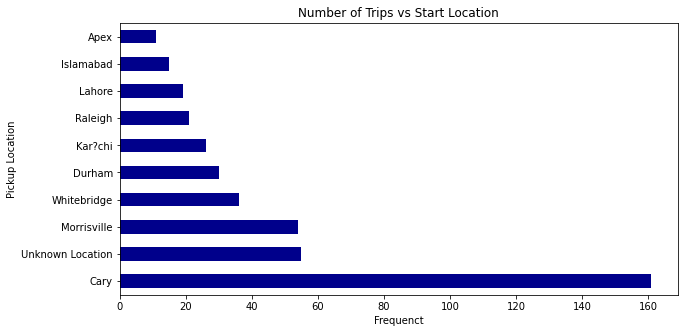

In [21]:
dec_slots = uber_df['START*'].value_counts().nlargest(10)
dec_slots.plot(kind = 'barh', color ='darkblue', figsize=(10,5))
plt.xlabel('Frequenct')
plt.ylabel('Pickup Location')
plt.title('Number of Trips vs Start Location')

In [22]:
#There is a huge skew in pickups from Cary, this is good evidence that the individual may live or work in Cary. Next let's check drop off

Text(0.5, 1.0, 'Number of Trips vs End Location')

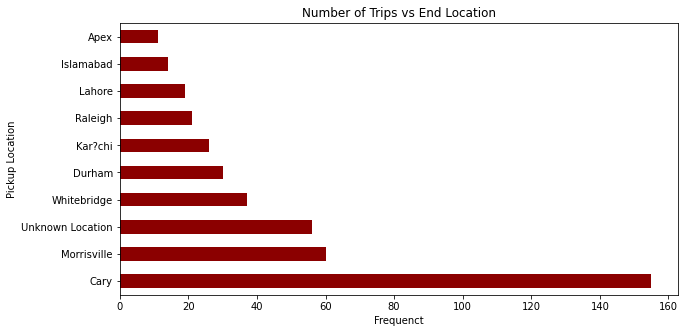

In [23]:
dec_slots = uber_df['STOP*'].value_counts().nlargest(10)
dec_slots.plot(kind = 'barh', color ='darkred', figsize=(10,5))
plt.xlabel('Frequenct')
plt.ylabel('Pickup Location')
plt.title('Number of Trips vs End Location')

In [24]:
#More evidence that this user lives or works in Cary and the top ten are exactly the same as the pickup points. Since most of this users rides are business we can assume that most of this users clients reside in this area and his is constantly riding from one to another

Text(0.5, 1.0, 'Frequency of A to B Rides')

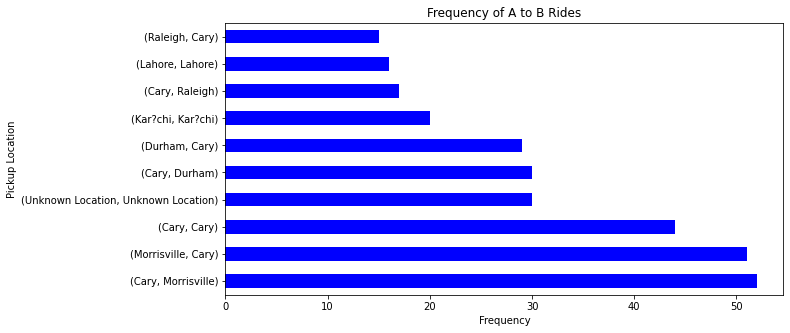

In [25]:
dec_slots = uber_df[['START*','STOP*']].value_counts().nlargest(10)
dec_slots.plot(kind = 'barh', color ='blue', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup Location')
plt.title('Frequency of A to B Rides')

## Creating a Necessity Score

Our next goal is to create a score that determines how badly a ride was "needed" given the all the features we examined above (most popular day of the week, hour, month etc). We will start my scoring each individual feature, however we will need to ensure that each is weighted properly. We will do this by creating our initial score from the relation of the features frequency. This will make more sence as we continue below. As an example we will start with examining which frequency of rides by the hour of day they were called.

In [26]:
hours = uber_df['HOUR'].value_counts().rename_axis('hour_of_day').reset_index(name='rides')
hours['score'] = [x/max(test['rides']) for x in test['rides']]
hours

,hour_of_day,rides,score
0,13,55,1.000000
1,14,52,0.945455
2,17,51,0.927273
3,15,51,0.927273
4,18,51,0.927273
5,16,45,0.818182
6,20,45,0.818182
7,12,43,0.781818
8,11,39,0.709091
9,19,35,0.636364


Here we have weighted each hour of day with a score with 1 being most frequent and 0.018 being the least frequent. We will wrap this into a function and create the data frames for each feature

In [27]:
def feature_scoring(uberdf_param):
    scored_df = uber_df[uberdf_param].value_counts().rename_axis('index').reset_index(name='rides')
    scored_df['score'] = [x/max(scored_df['rides']) for x in scored_df['rides']]
    return(scored_df)

In [28]:
purpose_score = feature_scoring('PURPOSE*')
hour_score = feature_scoring('HOUR')
day_score = feature_scoring('DAY')
month_score = feature_scoring('MONTH')
weekday_score = feature_scoring('WEEKDAY')
start_score = feature_scoring('START*')
stop_score = feature_scoring('STOP*')

In [29]:
stop_score

,index,rides,score
0,Cary,155,1.000000
1,Morrisville,60,0.387097
2,Unknown Location,56,0.361290
3,Whitebridge,37,0.238710
4,Durham,30,0.193548
...,...,...,...
132,Cedar Hill,1,0.006452
133,Florence,1,0.006452
134,Ridgeland,1,0.006452
135,Daytona Beach,1,0.006452


Great, now we have an individual frequency score for every parameter! Now how should we go about determining an overall score that can attempt to quantify the necessity of a ride? (Of course we are making the assumption that frequncy has a strong correlation with the "need" of a ride. I propose we do this by creating a new data frame where each row in our uber_df correlates to the feature frequency scores we just created. See below

Row 1 of uber df:
       START DATE  |    END DATE        | CATEGORY |   START    |   STOP    |MILES| PURPOSE      |DAY | ......
016-01-01 21:11:00	2016-01-01 21:17:00	Business	Fort Pierce	Fort Pierce	 5.1  Meal/Entertain 21	1 ......

New DF
|   START    |    STOP    | PURPOSE  |     DAY   |
    0.014        0.017       0.80          0.4       etc......

Then we will determine a "Most Needed Day" using our data and for each row of uber_df use a similarity search algorithm to determine the vector distance of the row and the most needed day.

Now the question becomes how do we determine what are the values of the features on the most needed day?
- We could use 1.00 for each feature score value because that would signify the most frequent case for each feature. However the problem is that this combination of the most frequent feature never actually occurs within the data set, Thus it would be inaccurate to calculate the distance of an actual ride to an an imaginary one based on the most frequent features.

In [30]:
uber_df[['START*','STOP*','PURPOSE*', 'HOUR', 'DAY', 'MONTH', 'WEEKDAY']].value_counts()

START*            STOP*             PURPOSE*         HOUR  DAY  MONTH  WEEKDAY 
Cary              Cary              Errand/Supplies  17    26   1      Tuesday     2
Durham            Cary              Meeting          23    28   6      Tuesday     2
Islamabad         Islamabad         Errand/Supplies  16    20   12     Tuesday     2
Unknown Location  Unknown Location  Meeting          17    22   12     Thursday    2
Cary              Cary              Meeting          15    22   11     Tuesday     2
                                                                                  ..
Durham            Cary              Meeting          22    29   4      Friday      1
                                                     23    1    7      Friday      1
                                                           2    7      Saturday    1
                                                           5    6      Sunday      1
Winston Salem     Asheville         Meeting          18    28   10    

Additionally if we just try to look at the most frequent ride ordered we can see that there are a lack of exactly repeated rides. 

- If we look at our graphs above We can see that START, STOP, and PURPOSE have the most disproportionate frequency. Thus, I propse we use the scores for the most frequent combination of those three features and then incorporate a 4th feature and use the highest frequency of that combo to determine the score to use for our "most needed ride" 
- Things will make more sense as we go :)

In [31]:
uber_df[['START*','STOP*','PURPOSE*']].value_counts()

START*         STOP*             PURPOSE*      
Cary           Morrisville       Meal/Entertain    27
               Durham            Meeting           27
Durham         Cary              Meeting           26
Morrisville    Cary              Meal/Entertain    18
                                 Customer Visit    18
                                                   ..
Islamabad      Unknown Location  Meeting            1
               Rawalpindi        Temporary Site     1
               Noorpur Shahan    Temporary Site     1
               Islamabad         Meeting            1
Winston Salem  Asheville         Meeting            1
Length: 334, dtype: int64

Since we are tied for top 2 we will take the average of the scores for PURPOSE (Meal and Meeting) and STOP (Morrisville & Durham)

In [32]:
uber_df[['START*','STOP*','PURPOSE*', 'HOUR']].value_counts()
#Top is 23

START*          STOP*        PURPOSE*         HOUR
Durham          Cary         Meeting          23      11
                                              13      10
Cary            Durham       Meeting          11       8
                                              20       8
                Morrisville  Meal/Entertain   18       7
                                                      ..
Heritage Pines  Whitebridge  Errand/Supplies  16       1
Hell's Kitchen  Midtown      Errand/Supplies  15       1
Hazelwood       Whitebridge  Errand/Supplies  16       1
                                              12       1
Winston Salem   Asheville    Meeting          18       1
Length: 525, dtype: int64

In [33]:
uber_df[['START*','STOP*','PURPOSE*', 'DAY']].value_counts()
#We can consider DAY negligible due to the lack of variance

START*          STOP*        PURPOSE*         DAY
Kar?chi         Kar?chi      Errand/Supplies  29     4
Cary            Cary         Meal/Entertain   21     4
Durham          Cary         Meeting          29     4
Lahore          Lahore       Errand/Supplies  24     4
Kar?chi         Kar?chi      Errand/Supplies  28     3
                                                    ..
Edgehill Farms  Whitebridge  Meal/Entertain   8      1
                                              6      1
                             Customer Visit   8      1
                                              7      1
Winston Salem   Asheville    Meeting          28     1
Length: 563, dtype: int64

In [34]:
uber_df[['START*','STOP*','PURPOSE*', 'WEEKDAY']].value_counts()
#Top is Friday

START*         STOP*           PURPOSE*         WEEKDAY  
Durham         Cary            Meeting          Friday       14
Cary           Durham          Meeting          Friday       13
Raleigh        Cary            Meeting          Friday        6
Cary           Morrisville     Meal/Entertain   Sunday        6
               Cary            Errand/Supplies  Tuesday       5
                                                             ..
Islamabad      Rawalpindi      Temporary Site   Monday        1
               Noorpur Shahan  Temporary Site   Sunday        1
               Islamabad       Meeting          Wednesday     1
                               Errand/Supplies  Sunday        1
Winston Salem  Asheville       Meeting          Friday        1
Length: 478, dtype: int64

In [35]:
uber_df[['START*','STOP*','PURPOSE*', 'MONTH']].value_counts()
#Top is 12

START*            STOP*             PURPOSE*         MONTH
Kar?chi           Kar?chi           Errand/Supplies  12       10
Cary              Durham            Meeting          6         9
Durham            Cary              Meeting          6         9
Unknown Location  Unknown Location  Meeting          12        8
Morrisville       Cary              Customer Visit   12        7
                                                              ..
Holly Springs     Cary              Temporary Site   4         1
                                    Between Offices  11        1
Heritage Pines    Whitebridge       Errand/Supplies  2         1
Hell's Kitchen    Midtown           Errand/Supplies  1         1
Winston Salem     Asheville         Meeting          10        1
Length: 460, dtype: int64

In [36]:
stop_score[stop_score['index'] == 'Morrisville']['score'].rename_axis('index').reset_index(name='score').values[0][1]

0.3870967741935484

In [37]:
start_score[start_score['index'] == 'Cary']['score'].rename_axis('index').reset_index(name='score').values[0][1]

1.0

In [38]:
need = [start_score[start_score['index'] == 'Cary']['score'].rename_axis('index').reset_index(name='score').values[0][1],
               (stop_score[stop_score['index'] == 'Morrisville']['score'].rename_axis('index').reset_index(name='score').values[0][1] + stop_score[stop_score['index'] == 'Durham']['score'].rename_axis('index').reset_index(name='score').values[0][1])/2,
               (purpose_score[purpose_score['index'] == 'Meeting']['score'].rename_axis('index').reset_index(name='score').values[0][1] + purpose_score[purpose_score['index'] == 'Meal/Entertain']['score'].rename_axis('index').reset_index(name='score').values[0][1])/2,
               weekday_score[weekday_score['index'] == 'Friday']['score'].rename_axis('index').reset_index(name='score').values[0][1],
               month_score[month_score['index'] == 12]['score'].rename_axis('index').reset_index(name='score').values[0][1]]
need = np.array(need)

Now lets create a function that can read the rows of our uber_df and then output an array of vectors containing the indivudal feature scores

In [39]:
def score(start, stop, purpose, weekday, month):
    try:
        start_val = start_score[start_score['index'] == start]['score'].rename_axis('index').reset_index(name='score').values[0][1]
    except KeyError:
        start_val = 0  # or some other default value
    try:
        stop_val = stop_score[stop_score['index'] == stop]['score'].rename_axis('index').reset_index(name='score').values[0][1]
    except KeyError:
        stop_val = 0  # or some other default value
    try:
        purpose_val = purpose_score[purpose_score['index'] == purpose]['score'].rename_axis('index').reset_index(name='score').values[0][1]
    except KeyError:
        purpose_val = 0  # or some other default value
    try:
        weekday_val = weekday_score[weekday_score['index'] == weekday]['score'].rename_axis('index').reset_index(name='score').values[0][1]
    except KeyError:
        weekday_val = 0  # or some other default value
    try:
        month_val = month_score[month_score['index'] == month]['score'].rename_axis('index').reset_index(name='score').values[0][1]
    except KeyError:
        month_val = 0  # or some other default value
    return [start_val, stop_val, purpose_val, weekday_val, month_val]



In [40]:
# def score(start, stop, purpose, weekday, month):
#     return [start_score[start_score['index'] == start]['score'].rename_axis('index').reset_index(name='score').values[0][1],
#                stop_score[stop_score['index'] == stop]['score'].rename_axis('index').reset_index(name='score').values[0][1],
#                purpose_score[purpose_score['index'] == purpose]['score'].rename_axis('index').reset_index(name='score').values[0][1],
#                weekday_score[weekday_score['index'] == weekday]['score'].rename_axis('index').reset_index(name='score').values[0][1],
#                month_score[month_score['index'] == month]['score'].rename_axis('index').reset_index(name='score').values[0][1]]

In [42]:
uber_df= uber_df.reset_index()

In [43]:
print(score(uber_df['START*'][0], uber_df['STOP*'][0], uber_df['PURPOSE*'][0], uber_df['WEEKDAY'][0], uber_df['MONTH'][0]))
print(score(uber_df['START*'][1], uber_df['STOP*'][1], uber_df['PURPOSE*'][1], uber_df['WEEKDAY'][1], uber_df['MONTH'][1]))




[0.024844720496894408, 0.01935483870967742, 0.8556149732620321, 1.0, 0.44029850746268656]
[0.024844720496894408, 0.01935483870967742, 0.6844919786096256, 0.664, 0.44029850746268656]


In [44]:
for i in range(0, 1):
        print(i)

0


In [45]:
uber_df_feature_scores = []
for i in range(0, len(uber_df)):
    uber_df_feature_scores.append(score(uber_df['START*'][i], uber_df['STOP*'][i], uber_df['PURPOSE*'][i], uber_df['WEEKDAY'][i], uber_df['MONTH'][i]))


In [46]:
uber_df_feature_scores

[[0.024844720496894408,
  0.01935483870967742,
  0.8556149732620321,
  1.0,
  0.44029850746268656],
 [0.024844720496894408,
  0.01935483870967742,
  0.6844919786096256,
  0.664,
  0.44029850746268656],
 [0.024844720496894408, 0.01935483870967742, 1.0, 0.752, 0.44029850746268656],
 [0.024844720496894408,
  0.012903225806451613,
  0.5401069518716578,
  0.68,
  0.44029850746268656],
 [0.012422360248447204,
  0.012903225806451613,
  0.8556149732620321,
  0.68,
  0.44029850746268656],
 [0.012422360248447204, 0.0064516129032258064, 1.0, 0.68, 0.44029850746268656],
 [1.0, 1.0, 1.0, 0.736, 0.44029850746268656],
 [1.0, 0.3870967741935484, 1.0, 0.696, 0.44029850746268656],
 [0.012422360248447204,
  0.025806451612903226,
  0.5401069518716578,
  0.696,
  0.44029850746268656],
 [0.024844720496894408,
  0.0064516129032258064,
  1.0,
  0.696,
  0.44029850746268656],
 [0.006211180124223602, 0.025806451612903226, 1.0, 0.696, 0.44029850746268656],
 [0.06832298136645963, 0.0064516129032258064, 1.0, 0.696

Now we want to implement a KNN Algorithm to see how close each ride is to our most needed ride

In [47]:
import math

def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points.
    
    Args:
        point1 (list): The coordinates of the first point.
        point2 (list): The coordinates of the second point.
        
    Returns:
        float: The Euclidean distance between the two points.
    """
    # Unpack the coordinates of the two points
    x1, y1, z1, a1, b1 = point1
    x2, y2, z2, a2, b2 = point2
    
    # Calculate the Euclidean distance
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2 + (a2 - a1)**2 + (b2 - b1)**2)
    
    return distance

This modified version of the euclidean_distance() function calculates the Euclidean distance between the most needed ride point and each point in uber_df, and returns the distance

We can then use this modified euclidean_distance() function to calculate the need percentage by dividing the distance by the maximum distance in uber_df and subracting that value from 1

In [48]:
# def euclidean_distance(X_train, x_test):
#     distances = []
#     for i in range(len(X_train)):
#         distance = np.sqrt(np.sum((x_test - X_train[i])**2))
#         distances.append(distance)
#     max_distance = max(distances)
#     return 1 - (np.sqrt(np.sum((x_test - X_train[i])**2)) / max_distance)

In [61]:
need_scores = []
for i in range(0, len(uber_df_feature_scores)):
    need_scores.append(euclidean_distance(need, uber_df_feature_scores[i]))
f = lambda x: 1 - (x/max(need_scores))
need_scores = [f(x) for x in need_scores]
need_scores

[0.31548793536281317,
 0.2741977065207034,
 0.29998748769717043,
 0.2542439516486308,
 0.283041438851363,
 0.28216078201787587,
 0.4421617407305727,
 0.6170613833986224,
 0.252513578503323,
 0.2905623329362743,
 0.28417877157085125,
 0.31125238028768243,
 0.18361946433465715,
 0.2756959768381967,
 0.31125238028768243,
 0.28881984672979866,
 0.32005624158987256,
 0.2921700803255871,
 0.27688664747240577,
 0.2572663352441159,
 0.28318055733766234,
 0.2982054439800833,
 0.28811128218934856,
 0.27917594019309044,
 0.2607159260089379,
 0.274042052907164,
 0.32189761867740707,
 0.6617766584809789,
 0.28036455603235144,
 0.435100653018885,
 0.3007753147775847,
 0.20721847098412738,
 0.6060157918826132,
 0.2851392559924366,
 0.2018344193558298,
 0.4255240378678219,
 0.4421617407305727,
 0.4421617407305727,
 0.3919075055794924,
 0.30417941626646205,
 0.37856971205698553,
 0.4280173296392562,
 0.4280173296392562,
 0.43202551525886146,
 0.5462890150973811,
 0.24570969626869033,
 0.314655681387838

In [69]:
uber_df['NEED %'] = need_scores
uber_df

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,NEED %
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,0.315488
1,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,0.274198
2,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,0.299987
3,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,0.254244
4,5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2,0.283041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5,0.459826
649,1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5,0.337674
650,1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5,0.559295
651,1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5,0.248791


In [65]:
uber_df[['START*','STOP*','PURPOSE*']].value_counts()

START*         STOP*             PURPOSE*      
Cary           Morrisville       Meal/Entertain    27
               Durham            Meeting           27
Durham         Cary              Meeting           26
Morrisville    Cary              Meal/Entertain    18
                                 Customer Visit    18
                                                   ..
Islamabad      Unknown Location  Meeting            1
               Rawalpindi        Temporary Site     1
               Noorpur Shahan    Temporary Site     1
               Islamabad         Meeting            1
Winston Salem  Asheville         Meeting            1
Length: 334, dtype: int64

In [68]:
uber_df[uber_df['NEED %'] > .80]

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,NEED %
521,1011,2016-12-01 18:00:00,2016-12-01 18:12:00,Business,Cary,Morrisville,2.9,Meal/Entertain,18,1,12,Thursday,3,0.828519
523,1013,2016-12-02 12:12:00,2016-12-02 12:23:00,Business,Cary,Apex,5.1,Meal/Entertain,12,2,12,Friday,4,0.863589
525,1015,2016-12-02 20:41:00,2016-12-02 20:48:00,Business,Cary,Morrisville,3.3,Meal/Entertain,20,2,12,Friday,4,0.928681
529,1020,2016-12-04 18:56:00,2016-12-04 19:03:00,Business,Cary,Morrisville,2.9,Meal/Entertain,18,4,12,Sunday,6,0.806782
540,1032,2016-12-09 12:09:00,2016-12-09 12:24:00,Business,Cary,Apex,5.1,Errand/Supplies,12,9,12,Friday,4,0.806487
548,1040,2016-12-11 16:06:00,2016-12-11 16:16:00,Business,Cary,Morrisville,3.0,Meal/Entertain,16,11,12,Sunday,6,0.806782
554,1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,17,12,12,Monday,0,0.806782
560,1054,2016-12-15 14:20:00,2016-12-15 14:54:00,Business,Cary,Morrisville,10.6,Meeting,14,15,12,Thursday,3,0.828519
